This script is intended to reproduce plots from Felice et. al. (2025) Diagnostic Tools for Evaluating Solvers for Stochastically Constrained Simulation Optimization Problems please ensure you have followed the download directions found here https://github.com/nicolefelice/stochastic_constraint_tools/blob/stoch_constraints/README.md before running. 

In [1]:
# Import the ProblemSolver class and other useful functions
from simopt.experiment_base import (
    ProblemSolver,
    post_normalize,
    plot_progress_curves,
    plot_solvability_cdfs,
    plot_feasibility,
    ProblemsSolvers,
    plot_terminal_progress,
    plot_feasibility_progress

)

In [2]:
from simopt.models.san import SANLongestPathStochastic
from simopt.solvers.fcsa import FCSA

In [3]:
# initialize problem
initial = (5,)*13 # starting mean for each arc
constraint_nodes = [6,8] #nodes with corresponding stochastic constraints
max_length_to_node = [5, 5] # max expected length to each constraint node
budget = 10000 # number of simmulation replications ran by solver
problem_factors = {"constraint_nodes": constraint_nodes,
                   "length_to_node_constraint": max_length_to_node,
                    "initial_solution": initial, 
                   "budget": budget
}
problem = SANLongestPathStochastic(fixed_factors=problem_factors)
problems = [problem]

In [4]:
# initialize solvers
csa_factors = {"search_direction": "CSA",
               "normalize_grads": False,
               "report_all_solns": True,
               "crn_across_solns": False,
}
csa = FCSA(fixed_factors=csa_factors, name="CSA")
csa_n_factors = {"search_direction": "CSA",
               "normalize_grads": True,
               "report_all_solns": True,
               "crn_across_solns": False,
}
csa_n = FCSA(fixed_factors=csa_n_factors, name="CSA-N")
fcsa_factors = {"search_direction": "FCSA",
               "normalize_grads": True,
               "report_all_solns": True,
               "crn_across_solns": False,
}
fcsa = FCSA(fixed_factors=fcsa_factors, name = "FCSA")
solvers = [csa, csa_n, fcsa]

In [5]:
#initialize experiment
myexperiment = ProblemsSolvers(solvers=solvers, problems=problems)

In [6]:
# Run a fixed number of macroreplications of the solver on the problem.
myexperiment.run(n_macroreps=10)

Running 10 macro-replications of CSA on SAN-2.
Running Solver CSA on Problem SAN-2.
Starting macroreplications in parallel
Finished running 10 macroreplications in 23.121 seconds.
File Name: CSA_on_SAN-2.pickle
Folder Name: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25
File Path: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25\CSA_on_SAN-2.pickle
Running 10 macro-replications of CSA-N on SAN-2.
Running Solver CSA-N on Problem SAN-2.
Starting macroreplications in parallel
Finished running 10 macroreplications in 23.661 seconds.
File Name: CSA-N_on_SAN-2.pickle
Folder Name: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25
File Path: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25\CSA-N_on_SAN-2.pickle
Running 10 macro-replications of FCSA on SAN-2.
Running Solver FCSA on Problem SAN-2.
Starting macroreplications in parallel
Finished running 10 macroreplications in 28.856 seconds.
File Name: FCSA_on_SAN-2.pickle
Folder Name: C:\Users\ni

In [7]:
# Run a fixed number of postreplications at all recommended solutions.
myexperiment.post_replicate(n_postreps=100)

Post-processing CSA on SAN-2.
Setting up 100 postreplications for 10 macroreplications of CSA on SAN-2.
Starting postreplications in parallel
Finished running 10 postreplications in 23.752 seconds.
File Name: CSA_on_SAN-2.pickle
Folder Name: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25
File Path: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25\CSA_on_SAN-2.pickle
Post-processing CSA-N on SAN-2.
Setting up 100 postreplications for 10 macroreplications of CSA-N on SAN-2.
Starting postreplications in parallel
Finished running 10 postreplications in 25.65 seconds.
File Name: CSA-N_on_SAN-2.pickle
Folder Name: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25
File Path: C:\Users\nikki\GitHub\simopt\experiments\2025-10-09_10-51-25\CSA-N_on_SAN-2.pickle
Post-processing FCSA on SAN-2.
Setting up 100 postreplications for 10 macroreplications of FCSA on SAN-2.
Starting postreplications in parallel
Finished running 10 postreplications in 24.29 seconds.
File

In [8]:
# Find an optimal solution x* for normalization.
myexperiment.post_normalize(100)

Postnormalizing on Problem SAN-2.
Finding f(x*)...
	...using best postreplicated solution as proxy for x*.


['C:\\Users\\nikki\\GitHub\\simopt\\experiments\\2025-10-09_10-51-25\\plots\\SOLVER_SET_on_SAN-2_terminal_violin_unnorm.png']

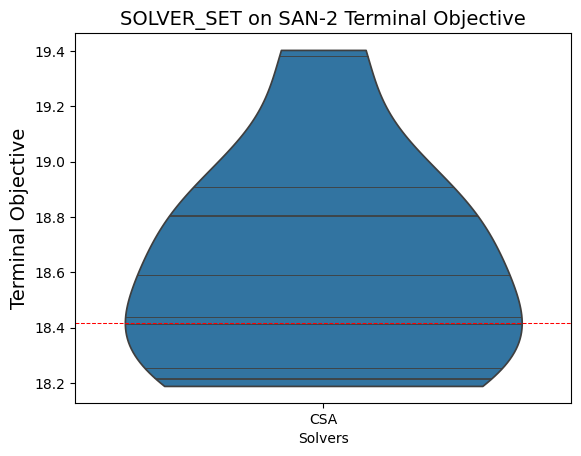

In [9]:
# Plot Figure 2
plot_experiments = myexperiment.experiments[0]
# plot Fig 2 a terminal objective density violin plot for csa
plot_terminal_progress(plot_experiments, "violin", plot_optimal = True, normalize=False)

In [ ]:
# plot Fig 2 b terminal objective density violin plot for csa
plot_feasibility([plot_experiments], "violin",  all_in_one=True, two_sided=True)

In [ ]:
# plot Figure 3
# plot Fig 3 a csa objective progress
plot_progress_curves(plot_experiments, "all", normalize=False)

In [ ]:
# plot Fig 3 a csa feasibility progress
plot_feasibility_progress([plot_experiments], "all", print_max_hw=False)

In [ ]:
# Plot Figure 4
plot_experiments = myexperiment.experiments[1]+myexperiment.experiments[2]
# plot Fig 4 a objective progress for csa-n and fcsa
plot_progress_curves(plot_experiments, "all", normalize=False)

In [ ]:
#plot Fig $ b feasibility progress for csa-n and fcsa
plot_feasibility_progress(myexperiment.experiments[1:3], "all", print_max_hw=False)

In [ ]:
# run experiments for reccomended solutions only for csa-n and fcsa
csa_n_factors = {"search_direction": "CSA",
               "normalize_grads": True,
               "report_all_solns": False,
               "crn_across_solns": False,
}
csa_n = FCSA(fixed_factors=csa_n_factors, name="CSA-N")
fcsa_factors = {"search_direction": "FCSA",
               "normalize_grads": True,
               "report_all_solns": False,
               "crn_across_solns": False,
}
fcsa = FCSA(fixed_factors=fcsa_factors, name = "FCSA")
solvers = [csa_n, fcsa]

In [ ]:
#initialize experiment
myexperiment = ProblemsSolvers(solvers=solvers, problems=problems)

In [ ]:
# Run a fixed number of macroreplications of the solver on the problem.
myexperiment.run(n_macroreps=10)

In [ ]:
# Run a fixed number of postreplications at all recommended solutions.
myexperiment.post_replicate(n_postreps=100)

In [ ]:
# Find an optimal solution x* for normalization.
myexperiment.post_normalize(100)

In [ ]:
# plot Figure 5
plot_feasibility(myexperiment.experiments)